In [2]:
   from google.colab import drive

   drive.mount('/content/drive')

Mounted at /content/drive


# Varying Epochs from 10 to 70

Epoch 1/10
48/48 [==============================] - 5s 35ms/step - loss: 2.2348e-04 - val_loss: 3.2974e-04
Epoch 2/10
48/48 [==============================] - 1s 19ms/step - loss: 2.1351e-04 - val_loss: 3.4306e-04
Epoch 3/10
48/48 [==============================] - 1s 20ms/step - loss: 2.1508e-04 - val_loss: 3.2774e-04
Epoch 4/10
48/48 [==============================] - 1s 18ms/step - loss: 2.1376e-04 - val_loss: 3.2756e-04
Epoch 5/10
48/48 [==============================] - 1s 18ms/step - loss: 2.1334e-04 - val_loss: 3.4875e-04
Epoch 6/10
48/48 [==============================] - 1s 20ms/step - loss: 2.1405e-04 - val_loss: 3.2911e-04
Epoch 7/10
48/48 [==============================] - 1s 16ms/step - loss: 2.1569e-04 - val_loss: 3.3481e-04
Epoch 8/10
48/48 [==============================] - 1s 12ms/step - loss: 2.1557e-04 - val_loss: 3.2743e-04
Epoch 9/10
48/48 [==============================] - 1s 12ms/step - loss: 2.1704e-04 - val_loss: 3.2764e-04
Epoch 10/10
12/12 [==================

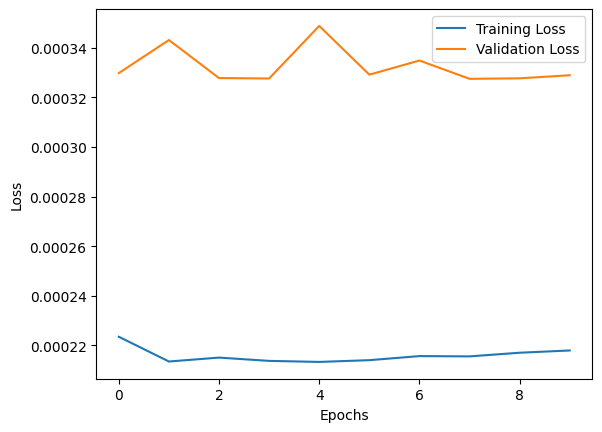

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for LSTM RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1010)

# Reshape the data for LSTM RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the LSTM RNN model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/20
48/48 [==============================] - 4s 22ms/step - loss: 2.4833e-04 - val_loss: 2.3403e-04
Epoch 2/20
48/48 [==============================] - 1s 13ms/step - loss: 2.3942e-04 - val_loss: 2.3676e-04
Epoch 3/20
48/48 [==============================] - 1s 12ms/step - loss: 2.4005e-04 - val_loss: 2.4189e-04
Epoch 4/20
48/48 [==============================] - 1s 19ms/step - loss: 2.4138e-04 - val_loss: 2.3990e-04
Epoch 5/20
48/48 [==============================] - 1s 18ms/step - loss: 2.3800e-04 - val_loss: 2.3572e-04
Epoch 6/20
48/48 [==============================] - 1s 18ms/step - loss: 2.3575e-04 - val_loss: 2.3143e-04
Epoch 7/20
48/48 [==============================] - 1s 18ms/step - loss: 2.3719e-04 - val_loss: 2.4840e-04
Epoch 8/20
48/48 [==============================] - 1s 19ms/step - loss: 2.3900e-04 - val_loss: 2.4528e-04
Epoch 9/20
48/48 [==============================] - 1s 19ms/step - loss: 2.3661e-04 - val_loss: 2.3077e-04
Epoch 10/20
48/48 [==================

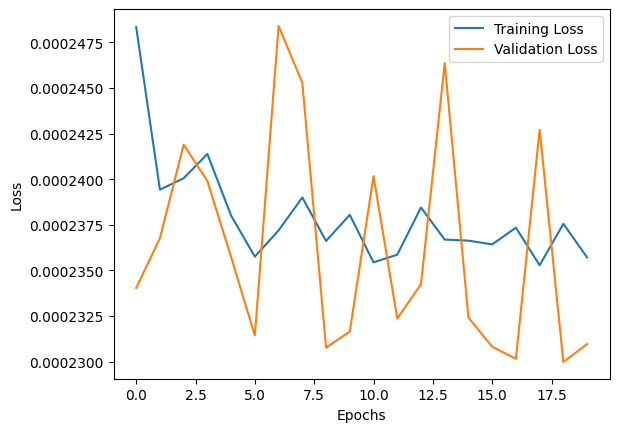

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for LSTM RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1029)

# Reshape the data for LSTM RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the LSTM RNN model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
48/48 [==============================] - 6s 34ms/step - loss: 2.3561e-04 - val_loss: 2.8311e-04
Epoch 2/30
48/48 [==============================] - 1s 19ms/step - loss: 2.3452e-04 - val_loss: 2.5501e-04
Epoch 3/30
48/48 [==============================] - 1s 20ms/step - loss: 2.3409e-04 - val_loss: 2.5379e-04
Epoch 4/30
48/48 [==============================] - 1s 20ms/step - loss: 2.3235e-04 - val_loss: 2.5704e-04
Epoch 5/30
48/48 [==============================] - 1s 20ms/step - loss: 2.3581e-04 - val_loss: 2.5362e-04
Epoch 6/30
48/48 [==============================] - 1s 21ms/step - loss: 2.3269e-04 - val_loss: 2.5766e-04
Epoch 7/30
48/48 [==============================] - 1s 20ms/step - loss: 2.3182e-04 - val_loss: 2.5471e-04
Epoch 8/30
48/48 [==============================] - 1s 16ms/step - loss: 2.3130e-04 - val_loss: 2.5261e-04
Epoch 9/30
48/48 [==============================] - 1s 12ms/step - loss: 2.3049e-04 - val_loss: 2.5361e-04
Epoch 10/30
48/48 [==================

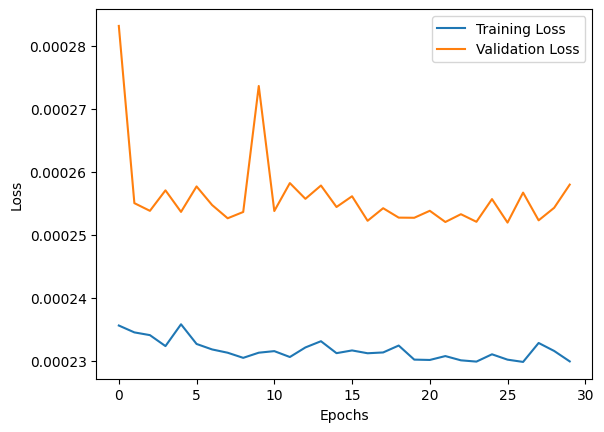

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for LSTM RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1031)

# Reshape the data for LSTM RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the LSTM RNN model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/40
48/48 [==============================] - 7s 23ms/step - loss: 2.5352e-04 - val_loss: 2.0473e-04
Epoch 2/40
48/48 [==============================] - 1s 11ms/step - loss: 2.4519e-04 - val_loss: 2.0408e-04
Epoch 3/40
48/48 [==============================] - 1s 12ms/step - loss: 2.4517e-04 - val_loss: 2.2189e-04
Epoch 4/40
48/48 [==============================] - 1s 12ms/step - loss: 2.4696e-04 - val_loss: 2.0426e-04
Epoch 5/40
48/48 [==============================] - 1s 12ms/step - loss: 2.4469e-04 - val_loss: 2.0382e-04
Epoch 6/40
48/48 [==============================] - 1s 12ms/step - loss: 2.4588e-04 - val_loss: 2.0429e-04
Epoch 7/40
48/48 [==============================] - 1s 13ms/step - loss: 2.4668e-04 - val_loss: 2.0924e-04
Epoch 8/40
48/48 [==============================] - 1s 12ms/step - loss: 2.4416e-04 - val_loss: 2.0638e-04
Epoch 9/40
48/48 [==============================] - 1s 12ms/step - loss: 2.4277e-04 - val_loss: 2.0398e-04
Epoch 10/40
48/48 [==================

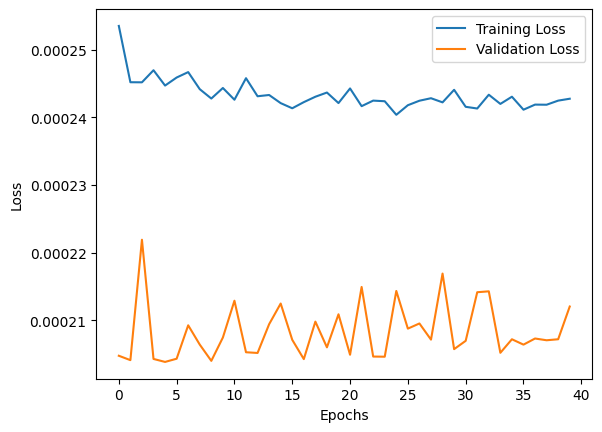

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for LSTM RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1045)

# Reshape the data for LSTM RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the LSTM RNN model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50
48/48 [==============================] - 5s 33ms/step - loss: 2.5454e-04 - val_loss: 2.0046e-04
Epoch 2/50
48/48 [==============================] - 1s 13ms/step - loss: 2.5972e-04 - val_loss: 1.9151e-04
Epoch 3/50
48/48 [==============================] - 1s 14ms/step - loss: 2.4681e-04 - val_loss: 1.9525e-04
Epoch 4/50
48/48 [==============================] - 1s 21ms/step - loss: 2.4667e-04 - val_loss: 1.8984e-04
Epoch 5/50
48/48 [==============================] - 1s 19ms/step - loss: 2.4883e-04 - val_loss: 2.0074e-04
Epoch 6/50
48/48 [==============================] - 1s 20ms/step - loss: 2.4558e-04 - val_loss: 1.9120e-04
Epoch 7/50
48/48 [==============================] - 1s 20ms/step - loss: 2.4955e-04 - val_loss: 2.0352e-04
Epoch 8/50
48/48 [==============================] - 1s 19ms/step - loss: 2.4685e-04 - val_loss: 1.9200e-04
Epoch 9/50
48/48 [==============================] - 1s 22ms/step - loss: 2.4636e-04 - val_loss: 1.9053e-04
Epoch 10/50
48/48 [==================

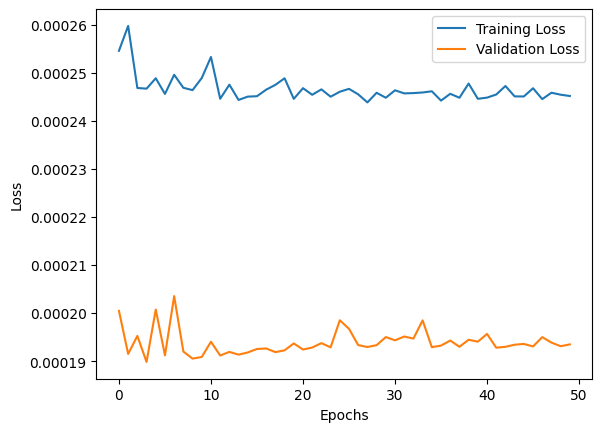

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for LSTM RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10599)

# Reshape the data for LSTM RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the LSTM RNN model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/60
48/48 [==============================] - 8s 54ms/step - loss: 2.5304e-04 - val_loss: 1.8709e-04
Epoch 2/60
48/48 [==============================] - 1s 20ms/step - loss: 2.5377e-04 - val_loss: 1.9248e-04
Epoch 3/60
48/48 [==============================] - 1s 18ms/step - loss: 2.5209e-04 - val_loss: 1.8679e-04
Epoch 4/60
48/48 [==============================] - 1s 12ms/step - loss: 2.5215e-04 - val_loss: 1.8775e-04
Epoch 5/60
48/48 [==============================] - 1s 12ms/step - loss: 2.5146e-04 - val_loss: 1.8700e-04
Epoch 6/60
48/48 [==============================] - 1s 13ms/step - loss: 2.4943e-04 - val_loss: 2.0126e-04
Epoch 7/60
48/48 [==============================] - 1s 13ms/step - loss: 2.4600e-04 - val_loss: 1.9166e-04
Epoch 8/60
48/48 [==============================] - 1s 13ms/step - loss: 2.4867e-04 - val_loss: 1.8844e-04
Epoch 9/60
48/48 [==============================] - 1s 13ms/step - loss: 2.4914e-04 - val_loss: 1.8924e-04
Epoch 10/60
48/48 [==================

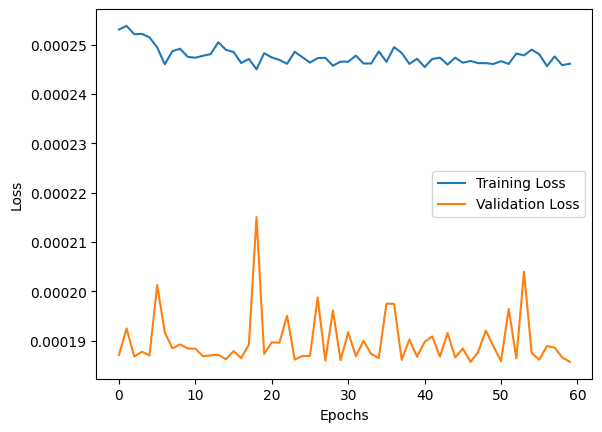

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for LSTM RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1067)

# Reshape the data for LSTM RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the LSTM RNN model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/70
48/48 [==============================] - 8s 31ms/step - loss: 2.7387e-04 - val_loss: 1.5095e-04
Epoch 2/70
48/48 [==============================] - 1s 13ms/step - loss: 2.5724e-04 - val_loss: 1.5063e-04
Epoch 3/70
48/48 [==============================] - 1s 13ms/step - loss: 2.6240e-04 - val_loss: 1.5117e-04
Epoch 4/70
48/48 [==============================] - 1s 12ms/step - loss: 2.5742e-04 - val_loss: 1.4921e-04
Epoch 5/70
48/48 [==============================] - 1s 12ms/step - loss: 2.5672e-04 - val_loss: 1.5167e-04
Epoch 6/70
48/48 [==============================] - 1s 12ms/step - loss: 2.6019e-04 - val_loss: 1.5961e-04
Epoch 7/70
48/48 [==============================] - 1s 13ms/step - loss: 2.5788e-04 - val_loss: 1.5106e-04
Epoch 8/70
48/48 [==============================] - 1s 13ms/step - loss: 2.5917e-04 - val_loss: 1.4863e-04
Epoch 9/70
48/48 [==============================] - 1s 12ms/step - loss: 2.5844e-04 - val_loss: 1.5131e-04
Epoch 10/70
48/48 [==================

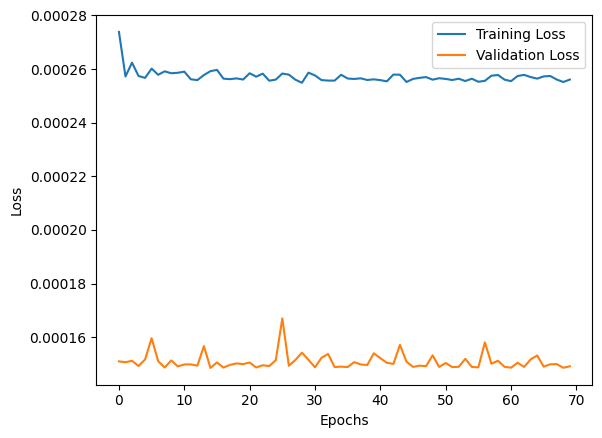

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for LSTM RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1071)

# Reshape the data for LSTM RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the LSTM RNN model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=70, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Varying Sequence Lengths

Epoch 1/30
49/49 [==============================] - 4s 20ms/step - loss: 2.3647e-04 - val_loss: 2.8683e-04
Epoch 2/30
49/49 [==============================] - 0s 9ms/step - loss: 2.3096e-04 - val_loss: 2.8441e-04
Epoch 3/30
49/49 [==============================] - 0s 9ms/step - loss: 2.2690e-04 - val_loss: 2.8927e-04
Epoch 4/30
49/49 [==============================] - 0s 9ms/step - loss: 2.2471e-04 - val_loss: 2.7680e-04
Epoch 5/30
49/49 [==============================] - 1s 11ms/step - loss: 2.2595e-04 - val_loss: 2.7684e-04
Epoch 6/30
49/49 [==============================] - 1s 13ms/step - loss: 2.2406e-04 - val_loss: 2.8565e-04
Epoch 7/30
49/49 [==============================] - 1s 13ms/step - loss: 2.2497e-04 - val_loss: 2.9570e-04
Epoch 8/30
49/49 [==============================] - 1s 13ms/step - loss: 2.2591e-04 - val_loss: 2.8177e-04
Epoch 9/30
49/49 [==============================] - 1s 13ms/step - loss: 2.2544e-04 - val_loss: 2.7745e-04
Epoch 10/30
49/49 [=====================

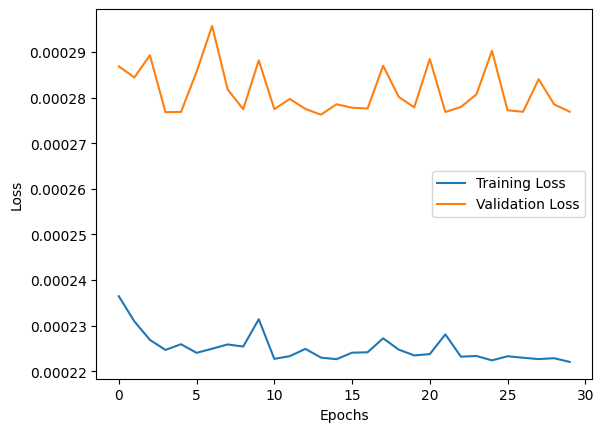

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for LSTM RNN
sequence_length = 10  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2014)

# Reshape the data for LSTM RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the LSTM RNN model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
48/48 [==============================] - 5s 36ms/step - loss: 2.3270e-04 - val_loss: 2.6923e-04
Epoch 2/30
48/48 [==============================] - 1s 13ms/step - loss: 2.3037e-04 - val_loss: 2.6597e-04
Epoch 3/30
48/48 [==============================] - 1s 12ms/step - loss: 2.2840e-04 - val_loss: 2.6558e-04
Epoch 4/30
48/48 [==============================] - 1s 12ms/step - loss: 2.3052e-04 - val_loss: 2.6608e-04
Epoch 5/30
48/48 [==============================] - 1s 21ms/step - loss: 2.2871e-04 - val_loss: 2.6290e-04
Epoch 6/30
48/48 [==============================] - 1s 20ms/step - loss: 2.3093e-04 - val_loss: 2.6462e-04
Epoch 7/30
48/48 [==============================] - 1s 20ms/step - loss: 2.3094e-04 - val_loss: 2.6422e-04
Epoch 8/30
48/48 [==============================] - 1s 21ms/step - loss: 2.2809e-04 - val_loss: 2.6514e-04
Epoch 9/30
48/48 [==============================] - 1s 19ms/step - loss: 2.2731e-04 - val_loss: 2.6548e-04
Epoch 10/30
48/48 [==================

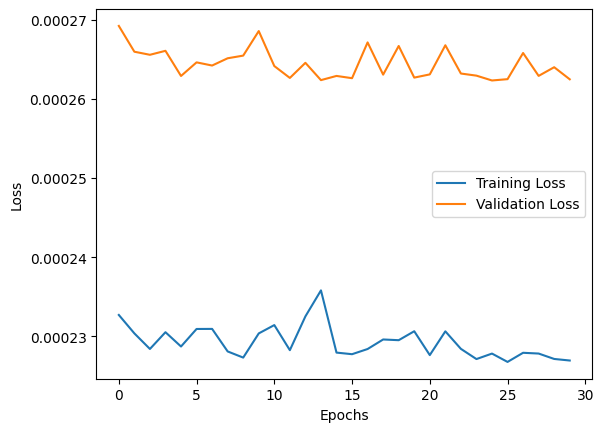

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for LSTM RNN
sequence_length = 20  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

# Reshape the data for LSTM RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the LSTM RNN model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
48/48 [==============================] - 8s 48ms/step - loss: 2.3571e-04 - val_loss: 2.8635e-04
Epoch 2/30
48/48 [==============================] - 1s 30ms/step - loss: 2.3260e-04 - val_loss: 2.7829e-04
Epoch 3/30
48/48 [==============================] - 1s 29ms/step - loss: 2.3336e-04 - val_loss: 2.6363e-04
Epoch 4/30
48/48 [==============================] - 1s 25ms/step - loss: 2.3322e-04 - val_loss: 2.6484e-04
Epoch 5/30
48/48 [==============================] - 1s 18ms/step - loss: 2.3025e-04 - val_loss: 2.6176e-04
Epoch 6/30
48/48 [==============================] - 1s 18ms/step - loss: 2.3000e-04 - val_loss: 2.6181e-04
Epoch 7/30
48/48 [==============================] - 1s 18ms/step - loss: 2.3145e-04 - val_loss: 2.6064e-04
Epoch 8/30
48/48 [==============================] - 1s 19ms/step - loss: 2.2900e-04 - val_loss: 2.7547e-04
Epoch 9/30
48/48 [==============================] - 1s 19ms/step - loss: 2.3464e-04 - val_loss: 2.6974e-04
Epoch 10/30
48/48 [==================

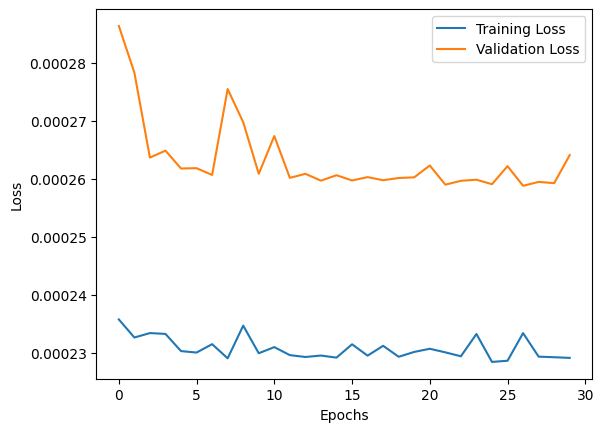

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for LSTM RNN
sequence_length = 30  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2035)

# Reshape the data for LSTM RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the LSTM RNN model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
48/48 [==============================] - 8s 34ms/step - loss: 2.4781e-04 - val_loss: 2.4273e-04
Epoch 2/30
48/48 [==============================] - 1s 22ms/step - loss: 2.4266e-04 - val_loss: 2.4460e-04
Epoch 3/30
48/48 [==============================] - 1s 23ms/step - loss: 2.3716e-04 - val_loss: 2.4121e-04
Epoch 4/30
48/48 [==============================] - 1s 22ms/step - loss: 2.3596e-04 - val_loss: 2.4366e-04
Epoch 5/30
48/48 [==============================] - 1s 22ms/step - loss: 2.4486e-04 - val_loss: 2.4812e-04
Epoch 6/30
48/48 [==============================] - 1s 22ms/step - loss: 2.3930e-04 - val_loss: 2.4126e-04
Epoch 7/30
48/48 [==============================] - 1s 22ms/step - loss: 2.3973e-04 - val_loss: 2.4110e-04
Epoch 8/30
48/48 [==============================] - 1s 23ms/step - loss: 2.3548e-04 - val_loss: 2.4275e-04
Epoch 9/30
48/48 [==============================] - 1s 23ms/step - loss: 2.3615e-04 - val_loss: 2.4111e-04
Epoch 10/30
48/48 [==================

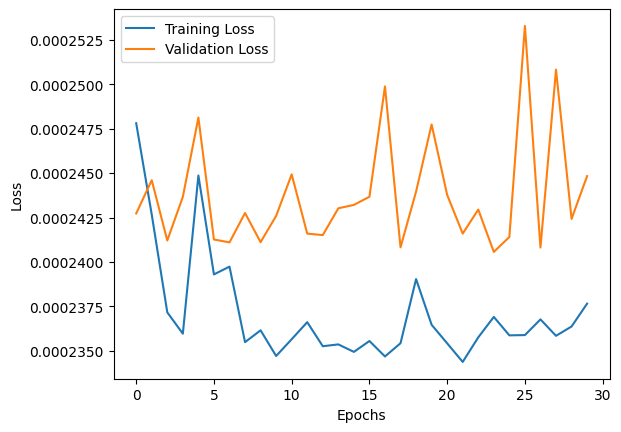

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for LSTM RNN
sequence_length = 40  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2042)

# Reshape the data for LSTM RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the LSTM RNN model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
48/48 [==============================] - 7s 50ms/step - loss: 2.5137e-04 - val_loss: 2.0838e-04
Epoch 2/30
48/48 [==============================] - 1s 24ms/step - loss: 2.4692e-04 - val_loss: 2.0562e-04
Epoch 3/30
48/48 [==============================] - 1s 24ms/step - loss: 2.4710e-04 - val_loss: 2.1524e-04
Epoch 4/30
48/48 [==============================] - 1s 24ms/step - loss: 2.5165e-04 - val_loss: 2.0615e-04
Epoch 5/30
48/48 [==============================] - 1s 24ms/step - loss: 2.4800e-04 - val_loss: 2.3766e-04
Epoch 6/30
48/48 [==============================] - 1s 24ms/step - loss: 2.4883e-04 - val_loss: 2.0867e-04
Epoch 7/30
48/48 [==============================] - 2s 37ms/step - loss: 2.4601e-04 - val_loss: 2.0705e-04
Epoch 8/30
48/48 [==============================] - 2s 40ms/step - loss: 2.4598e-04 - val_loss: 2.0908e-04
Epoch 9/30
48/48 [==============================] - 2s 39ms/step - loss: 2.4882e-04 - val_loss: 2.1292e-04
Epoch 10/30
48/48 [==================

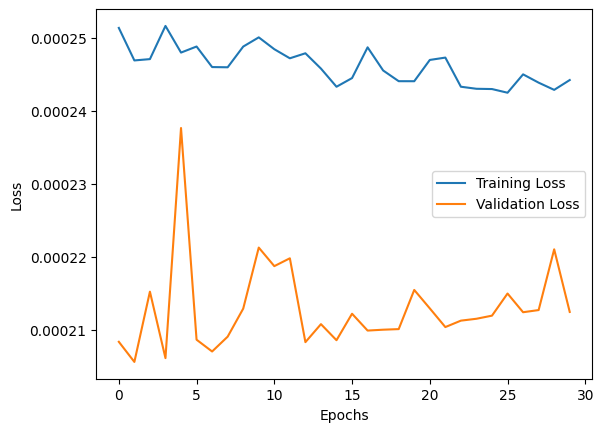

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for LSTM RNN
sequence_length = 50  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2056)

# Reshape the data for LSTM RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the LSTM RNN model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
47/47 [==============================] - 4s 44ms/step - loss: 2.5776e-04 - val_loss: 2.0609e-04
Epoch 2/30
47/47 [==============================] - 2s 33ms/step - loss: 2.5231e-04 - val_loss: 2.0432e-04
Epoch 3/30
47/47 [==============================] - 2s 33ms/step - loss: 2.4821e-04 - val_loss: 2.0999e-04
Epoch 4/30
47/47 [==============================] - 2s 48ms/step - loss: 2.4785e-04 - val_loss: 2.2975e-04
Epoch 5/30
47/47 [==============================] - 3s 56ms/step - loss: 2.4726e-04 - val_loss: 2.0427e-04
Epoch 6/30
47/47 [==============================] - 2s 50ms/step - loss: 2.4953e-04 - val_loss: 2.0448e-04
Epoch 7/30
47/47 [==============================] - 2s 41ms/step - loss: 2.4816e-04 - val_loss: 2.0693e-04
Epoch 8/30
47/47 [==============================] - 2s 33ms/step - loss: 2.4880e-04 - val_loss: 2.1003e-04
Epoch 9/30
47/47 [==============================] - 2s 34ms/step - loss: 2.4654e-04 - val_loss: 2.1428e-04
Epoch 10/30
47/47 [==================

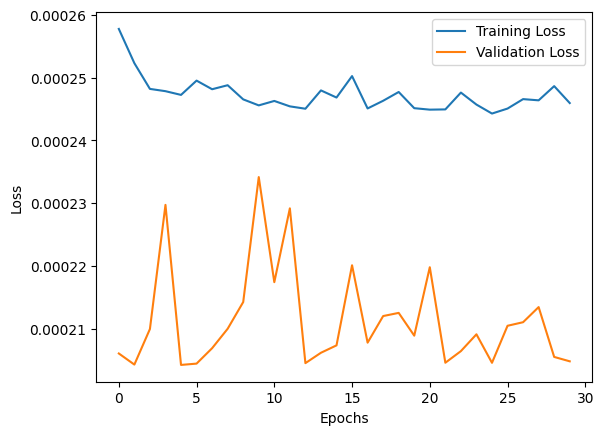

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for LSTM RNN
sequence_length = 60  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=206)

# Reshape the data for LSTM RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the LSTM RNN model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/30
47/47 [==============================] - 5s 42ms/step - loss: 2.7264e-04 - val_loss: 1.5689e-04
Epoch 2/30
47/47 [==============================] - 1s 31ms/step - loss: 2.6795e-04 - val_loss: 1.8694e-04
Epoch 3/30
47/47 [==============================] - 2s 37ms/step - loss: 2.6269e-04 - val_loss: 1.5986e-04
Epoch 4/30
47/47 [==============================] - 2s 53ms/step - loss: 2.6267e-04 - val_loss: 1.5669e-04
Epoch 5/30
47/47 [==============================] - 2s 51ms/step - loss: 2.6402e-04 - val_loss: 1.7015e-04
Epoch 6/30
47/47 [==============================] - 2s 52ms/step - loss: 2.6445e-04 - val_loss: 1.6250e-04
Epoch 7/30
47/47 [==============================] - 1s 32ms/step - loss: 2.6348e-04 - val_loss: 1.5666e-04
Epoch 8/30
47/47 [==============================] - 1s 31ms/step - loss: 2.6113e-04 - val_loss: 1.5712e-04
Epoch 9/30
47/47 [==============================] - 1s 31ms/step - loss: 2.5997e-04 - val_loss: 1.5641e-04
Epoch 10/30
47/47 [==================

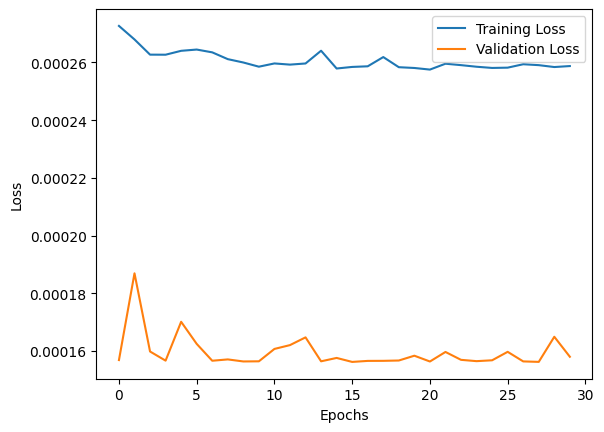

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset

data = pd.read_csv('/content/drive/MyDrive/hyundai.csv')
data.dropna(inplace=True)
data['Adj Close'] = data['Adj Close']/1000 # Scaling down by 1000

# Preprocess the data
scaler = MinMaxScaler()
data['Adj Close'] = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Calculate residuals
data['Residuals'] = data['Adj Close'].diff().fillna(0)  # Calculate price differences as residuals

# Prepare the data for LSTM RNN
sequence_length = 70  # You can adjust this window size
data_sequences = []
for i in range(len(data) - sequence_length):
    data_sequences.append(data['Residuals'].values[i:i+sequence_length+1])

data_sequences = np.array(data_sequences)

# Split the data into features and target
X = data_sequences[:, :-1]
y = data_sequences[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2076)

# Reshape the data for LSTM RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Build the LSTM RNN model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
